In [18]:
import requests
import pandas as pd

In [23]:
pip install lxml


   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB 262.6 kB/s eta 0:00:15
   ---------------------------------------- 0.0/3.8 MB 245.8 kB/s eta 0:00:16
    --------------------------------------- 0.1/3.8 MB 328.2 kB/s eta 0:00:12
   - -------------------------------------- 0.1/3.8 MB 516.7 kB/s eta 0:00:08
   - -------------------------------------- 0.1/3.8 MB 502.3 kB/s eta 0:00:08
   - -------------------------------------- 0.2/3.8 MB 518.9 kB/s eta 0:00:08
   -- ------------------------------------- 0.3/3.8 MB 710.0 kB/s eta 0:00:05
   --- ------------------------------------ 0.3/3.8 MB 737.3 kB/s eta 0:00:05
   --- -----------------------

In [2]:
url = 'https://en.wikipedia.org/wiki/Human_body_weight'

In [5]:
response = requests.get(url,headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36'
})

In [6]:
response

<Response [200]>

In [7]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Human body weight - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-

In [9]:
from bs4 import BeautifulSoup

In [11]:
out = BeautifulSoup(response.text, "html.parser")

In [12]:
out

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Human body weight - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feat

In [15]:
l = out.find_all('table',{'class':'wikitable'})

In [20]:
str(l[0])

'<table class="wikitable sortable">\n<tbody><tr>\n<th>Region\n</th>\n<th>Adult population<br/>(millions)\n</th>\n<th>Average weight\n</th>\n<th>Overweight population /<br/> total population\n</th>\n<th>Source\n</th></tr>\n<tr>\n<td><a href="/wiki/Africa" title="Africa">Africa</a></td>\n<td>535</td>\n<td>60.7\xa0kg (133.8\xa0lb)</td>\n<td>28.9%</td>\n<td><sup class="reference" id="cite_ref-biomed_11-0"><a href="#cite_note-biomed-11">[11]</a></sup>\n</td></tr>\n<tr>\n<td><a href="/wiki/Asia" title="Asia">Asia</a></td>\n<td>2,815</td>\n<td>57.7\xa0kg (127.2\xa0lb)</td>\n<td>24.2%</td>\n<td><sup class="reference" id="cite_ref-biomed_11-1"><a href="#cite_note-biomed-11">[11]</a></sup>\n</td></tr>\n<tr>\n<td><a href="/wiki/Europe" title="Europe">Europe</a></td>\n<td>606</td>\n<td>70.8\xa0kg (156.1\xa0lb)</td>\n<td>55.6%</td>\n<td><sup class="reference" id="cite_ref-biomed_11-2"><a href="#cite_note-biomed-11">[11]</a></sup>\n</td></tr>\n<tr>\n<td><a href="/wiki/Latin_America" title="Latin Ame

In [25]:
a = pd.read_html(str(l[0]))

C:\Users\HP\AppData\Local\Temp\ipykernel_3592\3348648589.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  a = pd.read_html(str(l[0]))


In [28]:
a

[                            Region  Adult population (millions)  \
 0                           Africa                          535   
 1                             Asia                         2815   
 2                           Europe                          606   
 3  Latin America and the Caribbean                          386   
 4                    North America                          263   
 5                          Oceania                           24   
 6                            World                         4630   
 
        Average weight Overweight population /  total population Source  
 0  60.7 kg (133.8 lb)                                     28.9%   [11]  
 1  57.7 kg (127.2 lb)                                     24.2%   [11]  
 2  70.8 kg (156.1 lb)                                     55.6%   [11]  
 3  67.9 kg (149.7 lb)                                     57.9%   [11]  
 4  80.7 kg (177.9 lb)                                     73.9%   [11]  
 5  74.1 k

In [32]:
df = a[0]

In [33]:
df

,Region,Adult population (millions),Average weight,Overweight population / total population,Source
0,Africa,535,60.7 kg (133.8 lb),28.9%,[11]
1,Asia,2815,57.7 kg (127.2 lb),24.2%,[11]
2,Europe,606,70.8 kg (156.1 lb),55.6%,[11]
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,[11]
4,North America,263,80.7 kg (177.9 lb),73.9%,[11]
5,Oceania,24,74.1 kg (163.4 lb),63.3%,[11]
6,World,4630,62.0 kg (136.7 lb),34.7%,[11]


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Region                                     7 non-null      object
 1   Adult population (millions)                7 non-null      int64 
 2   Average weight                             7 non-null      object
 3   Overweight population /  total population  7 non-null      object
 4   Source                                     7 non-null      object
dtypes: int64(1), object(4)
memory usage: 412.0+ bytes


In [35]:
df.drop(columns = 'Source', inplace = True)

In [36]:
df

,Region,Adult population (millions),Average weight,Overweight population / total population
0,Africa,535,60.7 kg (133.8 lb),28.9%
1,Asia,2815,57.7 kg (127.2 lb),24.2%
2,Europe,606,70.8 kg (156.1 lb),55.6%
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%
4,North America,263,80.7 kg (177.9 lb),73.9%
5,Oceania,24,74.1 kg (163.4 lb),63.3%
6,World,4630,62.0 kg (136.7 lb),34.7%


In [37]:
df['Average weight']

0    60.7 kg (133.8 lb)
1    57.7 kg (127.2 lb)
2    70.8 kg (156.1 lb)
3    67.9 kg (149.7 lb)
4    80.7 kg (177.9 lb)
5    74.1 kg (163.4 lb)
6    62.0 kg (136.7 lb)
Name: Average weight, dtype: object

In [38]:
a ='60.7 kg (133.8 lb)'

In [54]:
a.split('(')[1]

'133.8 lb)'

In [48]:
import re

In [57]:
float(re.findall("\d+\.\d+",a.split('(')[1])[0])

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_3592\1644093220.py:1: SyntaxWarning: invalid escape sequence '\d'
  float(re.findall("\d+\.\d+",a.split('(')[1])[0])


133.8

In [50]:
df["Average weight(kg)"] = df['Average weight'].apply(lambda x: float(re.findall("\d+\.\d+",a.split('(')[0])[0]))

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_3592\363614989.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["Average weight(kg)"] = df['Average weight'].apply(lambda x: float(re.findall("\d+\.\d+",a.split('(')[0])[0]))


In [51]:
df

,Region,Adult population (millions),Average weight,Overweight population / total population,Average weight(kg)
0,Africa,535,60.7 kg (133.8 lb),28.9%,60.7
1,Asia,2815,57.7 kg (127.2 lb),24.2%,60.7
2,Europe,606,70.8 kg (156.1 lb),55.6%,60.7
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,60.7
4,North America,263,80.7 kg (177.9 lb),73.9%,60.7
5,Oceania,24,74.1 kg (163.4 lb),63.3%,60.7
6,World,4630,62.0 kg (136.7 lb),34.7%,60.7


In [58]:
df["Average weight(lbs)"] = df['Average weight'].apply(lambda x: float(re.findall("\d+\.\d+",a.split('(')[1])[0]))

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_3592\1847372459.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["Average weight(lbs)"] = df['Average weight'].apply(lambda x: float(re.findall("\d+\.\d+",a.split('(')[1])[0]))


In [59]:
df

,Region,Adult population (millions),Average weight,Overweight population / total population,Average weight(kg),Average weight(lbs)
0,Africa,535,60.7 kg (133.8 lb),28.9%,60.7,133.8
1,Asia,2815,57.7 kg (127.2 lb),24.2%,60.7,133.8
2,Europe,606,70.8 kg (156.1 lb),55.6%,60.7,133.8
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,60.7,133.8
4,North America,263,80.7 kg (177.9 lb),73.9%,60.7,133.8
5,Oceania,24,74.1 kg (163.4 lb),63.3%,60.7,133.8
6,World,4630,62.0 kg (136.7 lb),34.7%,60.7,133.8


In [61]:
df.drop(columns = "Average weight", inplace = True)

In [62]:
df

,Region,Adult population (millions),Overweight population / total population,Average weight(kg),Average weight(lbs)
0,Africa,535,28.9%,60.7,133.8
1,Asia,2815,24.2%,60.7,133.8
2,Europe,606,55.6%,60.7,133.8
3,Latin America and the Caribbean,386,57.9%,60.7,133.8
4,North America,263,73.9%,60.7,133.8
5,Oceania,24,63.3%,60.7,133.8
6,World,4630,34.7%,60.7,133.8


In [69]:
df.columns

Index(['Region', 'Adult population (millions)',
       'Overweight population /  total population', 'Average weight(kg)',
       'Average weight(lbs)'],
      dtype='object')

In [70]:
df.rename(columns = {'Overweight population /  total population':'Overweight (%)'}, inplace = True)

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df

,Region,Adult population (millions),Overweight (%),Average weight(kg),Average weight(lbs)
0,Africa,535,28.9%,60.7,133.8
1,Asia,2815,24.2%,60.7,133.8
2,Europe,606,55.6%,60.7,133.8
3,Latin America and the Caribbean,386,57.9%,60.7,133.8
4,North America,263,73.9%,60.7,133.8
5,Oceania,24,63.3%,60.7,133.8
6,World,4630,34.7%,60.7,133.8


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Latin America and the Caribbean'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'Oceania'),
  Text(6, 0, 'World')])

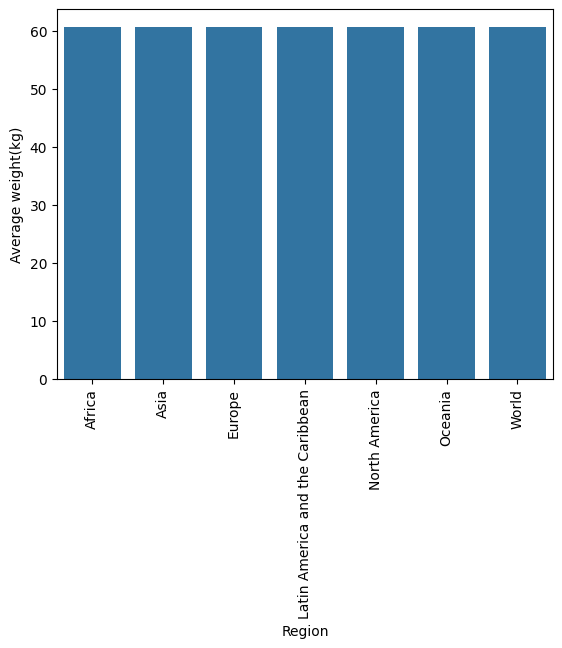

In [79]:
sns.barplot(x = df['Region'], y =df['Average weight(kg)'])
plt.xticks(rotation = 90)